## Corner Harris

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
flat_chess = cv2.imread('../DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

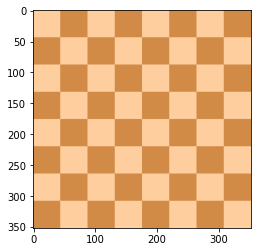

In [3]:
plt.imshow(flat_chess)

In [4]:
gray_board = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)

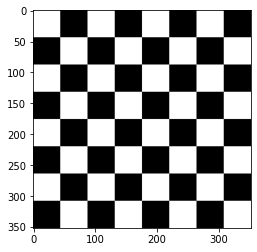

In [5]:
plt.imshow(gray_board, cmap='gray')

In [6]:
real_chess = cv2.imread('../DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

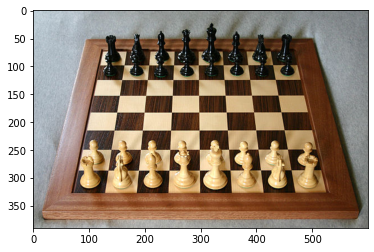

In [7]:
plt.imshow(real_chess)

In [8]:
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)

In [10]:
# Convert to float
gray_flat_chess = np.float32(gray_board)

In [12]:
dst = cv2.cornerHarris(src=gray_flat_chess, 
blockSize=2,
ksize=3,
k=0.04)

In [15]:
dst = cv2.dilate(dst, None)

In [17]:
flat_chess[dst>0.01*dst.max()] = [255, 0, 0]

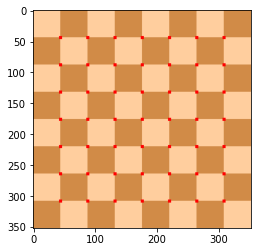

In [18]:
plt.imshow(flat_chess)

In [19]:
gray = np.float32(gray_real_chess)

In [20]:
pointers = cv2.cornerHarris(src= gray,
blockSize=2,
ksize=3,
k=0.04)

In [21]:
pointers = cv2.dilate(pointers, None)

In [22]:
real_chess[pointers>0.01*pointers.max()] = [0, 0, 255]

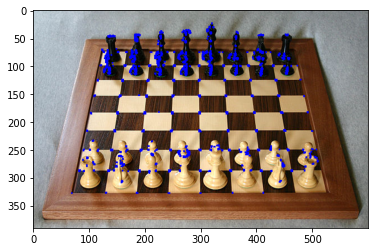

In [23]:
plt.imshow(real_chess)

## Shi - Tomasi Corner Detection

In [24]:
flat_chess = cv2.imread('../DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

real_chess = cv2.imread('../DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)

In [31]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess, 64, 0.01, 10)

In [32]:
corners = np.int0(corners)

In [33]:
for i in corners:
    x, y = i.ravel()
    cv2.circle(flat_chess, (x,y), 3, (255,0,0), -1)

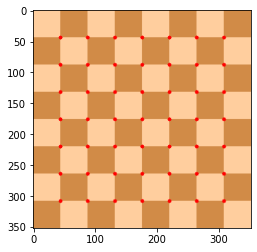

In [34]:
plt.imshow(flat_chess)

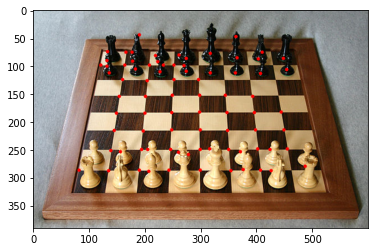

In [38]:
# On the real chess
corners = cv2.goodFeaturesToTrack(gray_real_chess, 80, 0.01, 10)

corners = np.int0(corners)

for i in corners:
    x, y = i.ravel()
    cv2.circle(real_chess, (x,y), 3, (255,0,0), -1)

plt.imshow(real_chess)